# Project 3

## Load data sets and packages

In [ ]:
# Import libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import KFold

# Import data sets
MNIST = pd.read_csv('Numbers.txt', sep=r'\s+')
CATSDOGS = pd.read_csv('catdogdata.txt', sep=r'\s+')

## Pre-processing

In [7]:
# Seperate labels from data
MNIST_labels = MNIST["V1"].values
MNIST_pixels = MNIST.iloc[:, 1:].values
CATSDOGS_labels = ["Cat"]*99 + ["Dog"]*99
CATSDOGS_pixels = CATSDOGS.iloc[:, :].values

# Standardize data
MNIST_scaler = StandardScaler()
MNIST_pixels = MNIST_scaler.fit_transform(MNIST_pixels)
CATSDOGS_scaler = StandardScaler()
CATSDOGS_pixels = CATSDOGS_scaler.fit_transform(CATSDOGS_pixels)

## Perform PCA

In [20]:
# PCA with variance threshold 95%
variance_threshold = 0.95

# MNIST
MNIST_PCA = PCA(n_components=variance_threshold)
MNIST_pixels_PCA = MNIST_PCA.fit_transform(MNIST_pixels)
MNIST_number_of_components = MNIST_PCA.n_components_
print("MNIST number of principal components: " + str(MNIST_number_of_components))

# Cats and Dogs
CATSDOGS_PCA = PCA(n_components=variance_threshold)
CATSDOGS_pixels_PCA = CATSDOGS_PCA.fit_transform(CATSDOGS_pixels)
CATSDOGS_number_of_components = CATSDOGS_PCA.n_components_
print("Cats and Dogs number of principal components: " + str(CATSDOGS_number_of_components))

MNIST number of principal components: 103
Cats and Dogs number of principal components: 92


## MNIST: K-Means tuning with silhouette score


Outer fold: 1
Best k: 7
Mean silhouette score: 0.11
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   0   0  61   0   0   0   0   1
1            0   9   0   0   9   5   0  29  31
2            0   0  19   0   0   1   1   0   0
3            3   0  40   0   6  10  10   0   0
4           28   1   6   0   3   8  40   2   0
5            2   0   0   0  32   3   0   0   0
6            0  28   0   0   0   7   0   5   0


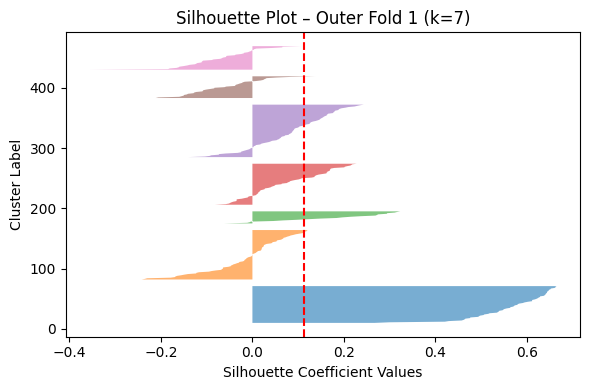


Outer fold: 2
Best k: 14
Mean silhouette score: 0.12
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   1   0   0   1   3   0   0  30
1            1   0   1   0  10   0   5   0   0
2            0   0  19   0   0   1   0   0   0
3           29   2   4   0   2   2   5   0   0
4            0   0   0  63   0   0   0   0   0
5            1   0  23   0   0   0   0   0   0
6            0   4   1   0   7   3   0  29   0
7            0   0   0   0   9   0   0   0   0
8            0  22   1   0   0   2   0   1   1
9            0   6   0   0   0  25   1   2   0
10           8   0   1   0   0   3  23   0   0
11           0  15   1   0   0   2   0   1   0
12           0   0  17   0   0   0   0   0   0
13           0   0   0   0  11   1   0   0   0


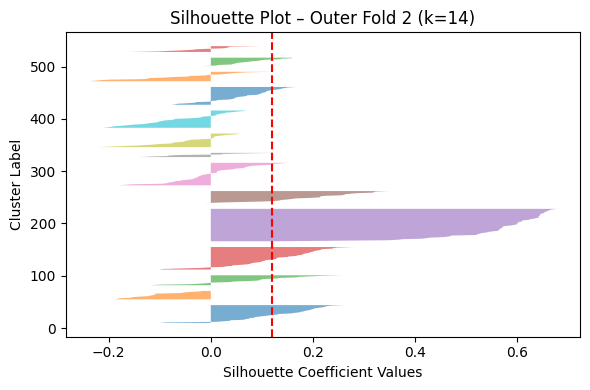


Outer fold: 3
Best k: 16
Mean silhouette score: 0.12
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   0   0  60   0   0   1   0   0
1            5   0   2   0   0   1  24   1   0
2            1   0   0   0  13   2   0   0   0
3            1   9   0   0   5   3   0  22  13
4            0   0  16   0   0   0   0   0   0
5            0   0   8   0   0   3   3   1   0
6            0   0   0   0   3   0   0   0   0
7            0   0   0   0  13   0   0   0   0
8            0   0  28   0   1   0   0   0   0
9            0  11   0   0   1   1   0   1   1
10           0   0   1   0   1   0   0   9  32
11           0   0  13   0   1   1   5   0   0
12           0   7   0   0   0   5   0   0   0
13          23   1   3   0   3   1   9   0   0
14           0   1   0   0   0  25   0   0   0
15           0   4   0   0   0   0   0   1   0


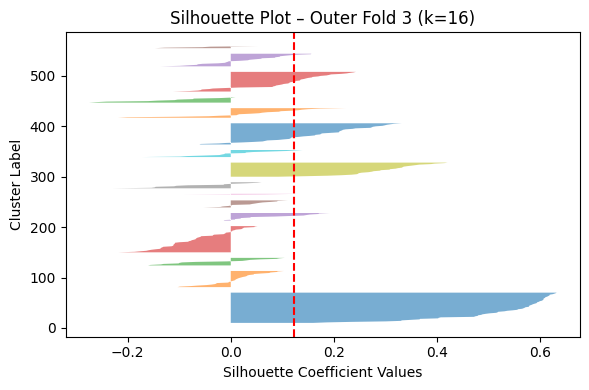


Outer fold: 4
Best k: 18
Mean silhouette score: 0.13
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0           31   0   2   0   2   0  15   2   0
1            1   0  21   0   0   0   1   1   0
2           13   1   3   0   2   0  16   0   0
3            0   1   0   0   1   0   0   0   9
4            2   0   0  58   0   0   0   0   0
5            0   2   1   0   6   0   0  17   1
6            0   0  23   0   0   2   0   0   1
7            0   1   0   0   0   3   0   0   0
8            0   0  17   0   0   1   0   0   0
9            1   5   0   0   0  17   1   3   1
10           0   1   0   0  11   0   0   0   0
11           0  16   0   0   0   1   0   1   0
12           0   0   0   0   0  13   1   0   0
13           0   0   0   0   1   0   0   4  22
14           0  10   0   0   0   1   0   0   1
15           0   0   0   0   9   0   0   0   0
16           0   0   0   0   8   1   2   0   0
17           0  12   0   0   0   0

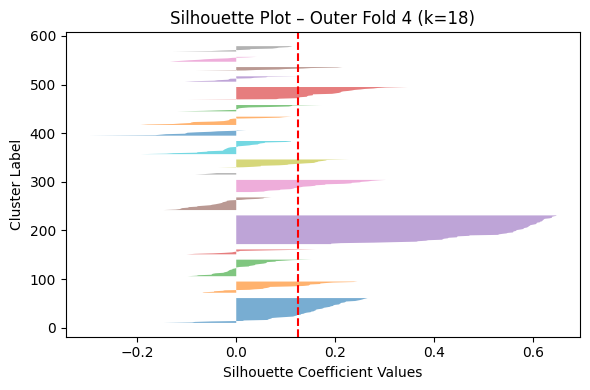


Outer fold: 5
Best k: 13
Mean silhouette score: 0.14
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   0   2   0  12   0   1   0   0
1           32   0   6   0   1   6  23   0   0
2            0   0  20   0   0   0   1   0   0
3            0   0   0  65   0   0   0   1   1
4            7   1  34   0   2   1   6   0   0
5            0   0  16   0   0   0   4   1   0
6            0   4   0   0   0  11   0   7   5
7            0   1   0   0   2   0   0   3  27
8            0  12   0   0   4   1   0  24   0
9            0   4   0   0   0   6   2   0   0
10           0   5   0   0   0   2   0   0   0
11           0  24   0   0   0   1   0   0   2
12           0   0   0   0   8   1   1   0   0


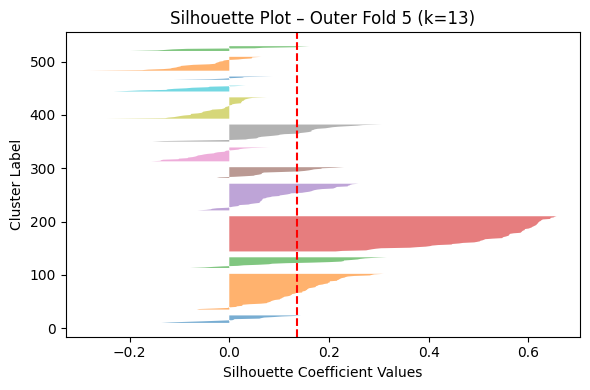


Silhouette Score mean over outer folds: 0.12
Silhouette Score std across outer folds: 0.01
Best k mean over outer folds: 13.6
Best k std over outer folds: 3.72


In [ ]:
# Number of clusters in K-Means
k_list = range(3, 20)

# Cross-validation parameters (double cross validation)
number_of_inner_k_folds = 5
number_of_outer_k_folds = 5

# Outer fold - Determines stability
outer_k_fold = KFold(
    n_splits=number_of_outer_k_folds, shuffle=True, random_state=123
)

# Store silhouette scores and best k:s
outer_silhouette_scores = []
best_k_list = []

for i, (outer_train_index, outer_test_index) in enumerate(
        outer_k_fold.split(MNIST_pixels_PCA)):
    
    print("\nOuter fold: " + str(i + 1))

    # Divide into test and train data
    MNIST_pixels_train = MNIST_pixels_PCA[outer_train_index]
    MNIST_pixels_test = MNIST_pixels_PCA[outer_test_index]

    # Inner fold - For tuning (number of clusters)
    inner_k_fold = KFold(
        n_splits=number_of_inner_k_folds, shuffle=True, random_state=i
    )

    # Dictionary for storing scores scores for each k
    k_metrics = {k: [] for k in k_list}

    for inner_train_index, inner_val_index in \
        inner_k_fold.split(MNIST_pixels_train):

        # Divide into test and train data
        inner_train = MNIST_pixels_train[inner_train_index]
        inner_val = MNIST_pixels_train[inner_val_index]

        # Perform K-Means clustering for each k
        for k in k_list:

            # K-Means 
            kmeans = KMeans(
                n_clusters=k, init='k-means++', random_state=0, n_init='auto'
            )
            kmeans.fit(inner_train)

            cluster_labels = kmeans.predict(inner_val)
            sil_score = silhouette_score(inner_val, cluster_labels)
            k_metrics[k].append(sil_score)

    # Calculate average silhouette scores for each k
    avg_scores = {k: np.mean(scores) for k, scores in k_metrics.items()}

    # Calculate best k
    best_k = max(avg_scores, key=avg_scores.get)
    best_k_list.append(best_k)
    print("Best k: " + str(best_k))

    # Calculate silluates on test data
    final_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
    final_kmeans.fit(MNIST_pixels_train)
    final_labels = final_kmeans.predict(MNIST_pixels_test)
    outer_sil = silhouette_score(MNIST_pixels_test, final_labels)
    outer_silhouette_scores.append(outer_sil)
    print("Mean silhouette score: " + str(round(outer_sil, 2)))

    # GENERATED WITH CHATGPT
    # Get true labels for the outer test set
    true_labels = MNIST_labels[outer_test_index]

    # Create a cross-tabulation (cluster vs true label)
    cluster_label_matrix = pd.crosstab(
        final_labels,  # predicted clusters
        true_labels,   # true MNIST labels
        rownames=['Cluster'], colnames=['True Label']
    )

    print("Confustion matrix:")
    print(cluster_label_matrix)

    # GENERATED WITH CHATGPT
    # Compute silhouette values
    sample_silhouette_values = silhouette_samples(MNIST_pixels_test, final_labels)

    # Create silhouette plot
    plt.figure(figsize=(6, 4))
    y_lower = 10
    for cluster in range(best_k):
        ith_cluster_silhouette_values = sample_silhouette_values[final_labels == cluster]
        ith_cluster_silhouette_values.sort()

        size_cluster = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster

        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            alpha=0.6
        )
        y_lower = y_upper + 10  # Space between clusters

    plt.title(f'Silhouette Plot – Outer Fold {i + 1} (k={best_k})')
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.axvline(x=outer_sil, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()


# Calculate final results and print
mean_outer_silhouette = np.mean(outer_silhouette_scores)
std_outer_silhouette = np.std(outer_silhouette_scores)
mean_outer_k = np.mean(best_k_list)
std_outer_k = np.std(best_k_list)

print("\nSilhouette Score mean over outer folds: " 
      + str(round(mean_outer_silhouette, 2)))
print("Silhouette Score std across outer folds: " 
      + str(round(std_outer_silhouette, 2)))
print("Best k mean over outer folds: " 
      + str(round(mean_outer_k, 2)))
print("Best k std over outer folds: " 
      + str(round(std_outer_k, 2)))

### Same code but without PCA (for comparison)


Outer fold: 1
Best k: 18
Mean silhouette score: 0.11
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0           10   0   2   0   0   2  13   0   0
1            0   0   0  61   0   0   0   0   0
2            0   8   0   0   0   7   0   2   0
3            0   0   0   0  22   0   4   0   0
4            0   1   0   0   0   0   0   1  10
5            0   0  10   0   0   0   0   0   0
6            0   0   0   0  12   0   0   3   0
7           19   0   3   0   0   1  19   0   0
8            2   0   0   0   0   1  13   0   0
9            0   3   0   0   0  18   1   2   0
10           0   0   0   0   1   1   0   4  22
11           0   0  14   0   3   0   1   0   0
12           0   8   0   0   2   2   0  21   0
13           0   5   0   0   1   0   0   2   0
14           0   0  10   0   1   1   0   0   0
15           2   0   0   0   8   1   0   0   0
16           0   0  26   0   0   0   0   0   0
17           0  13   0   0   0   0

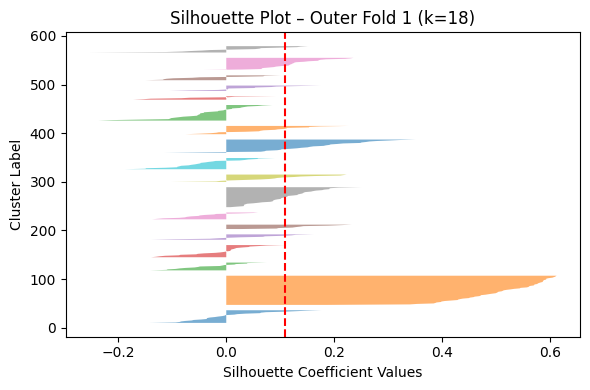


Outer fold: 2
Best k: 15
Mean silhouette score: 0.11
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   9   0   0   0   0   0   0   0
1           29   2   4   0   3   3   7   0   0
2            0  12   1   0   3   2   0   6   1
3            0   1   1   0   5   4   0  19  22
4            0   0  14   0   0   0   0   0   0
5            0   0   0   0  13   1   0   0   0
6            0   0   0  62   0   0   0   0   0
7            0   0   0   1  11   1   0   0   0
8           10   0   1   0   0   5  23   0   0
9            0   8   0   0   1  20   1   1   0
10           0   0  23   0   2   0   0   0   0
11           0  17   1   0   0   3   0   1   1
12           0   1   0   0   2   2   0   6   7
13           0   0   8   0   0   0   1   0   0
14           0   0  15   0   0   1   2   0   0


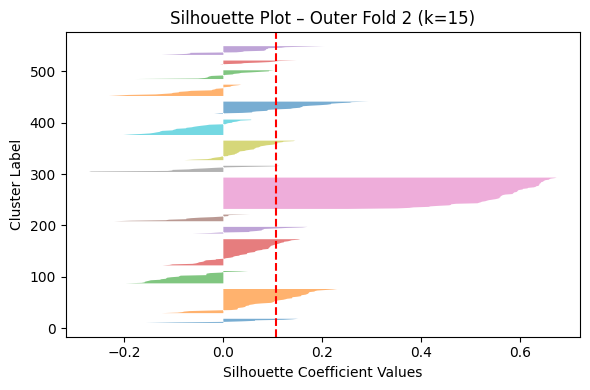


Outer fold: 3
Best k: 17
Mean silhouette score: 0.11
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   0   1   0   1   1   0   1  41
1            0   0   0   0  14   1   1   1   0
2            0   0   0  60   0   0   1   0   0
3            0   0  10   0   0   2   3   1   0
4            0   8   0   0   3   2   0  27   0
5            0   5   0   0   0  24   0   2   3
6            1   0   0   0  11   3   0   0   0
7            0   0  25   0   0   0   0   0   0
8            0   4   0   0   0   5   0   0   0
9            0  12   1   0   1   1   0   1   1
10           0   0   9   0   0   1   6   0   0
11           0   0  15   0   0   0   0   0   0
12           0   4   0   0   0   0   0   0   0
13           0   0   0   0   6   0   0   0   0
14          22   0   2   0   2   2   7   0   0
15           1   0   0   0   0   0  23   0   0
16           6   0   8   0   3   0   1   2   1


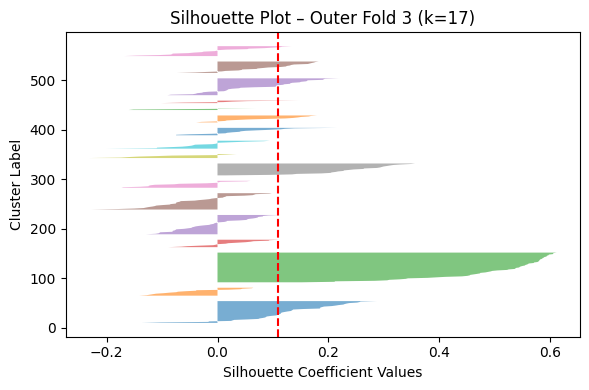


Outer fold: 4
Best k: 12
Mean silhouette score: 0.1
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0            0   1   0   0  29   1   0   0   0
1           29   0   2   0   4   1  11   4   0
2           17   1  10   0   1   2  18   0   0
3            0   0  17   0   0   1   1   0   0
4            0   8   0   0   4   2   0  17   0
5            0   0  21   0   0   2   0   0   1
6            0   1   0   0   2   2   0   5  32
7            0   1   0  58   0   0   0   0   0
8            0   1   0   0   0   3   0   0   0
9            1   0  17   0   0   1   4   1   0
10           0  24   0   0   0   1   0   0   1
11           1  12   0   0   0  23   2   1   1


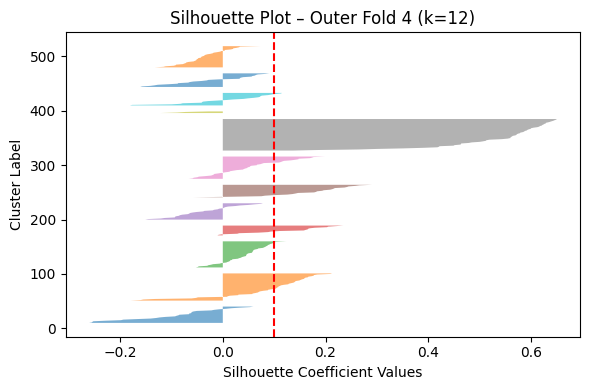


Outer fold: 5
Best k: 9
Mean silhouette score: 0.12
Confustion matrix:
True Label  -9  -2   0   1   2   5   6   8   9
Cluster                                       
0           34   1   6   0   2   5  24   0   0
1            0   0   1   0  21   2   2   0   0
2            5   0  38   0   1   1   7   2   0
3            0   1   0  65   0   0   0   1   2
4            0   0  30   0   0   1   4   0   0
5            0  21   0   0   0   1   0   0   2
6            0   8   1   0   0  17   1   2   0
7            0   7   2   0   4   2   0  28  31
8            0  13   0   0   1   0   0   3   0


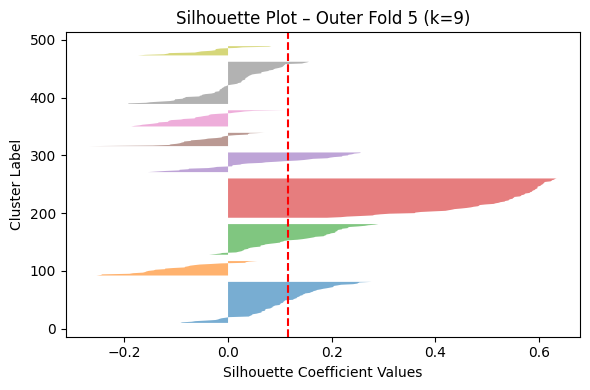


Silhouette Score mean over outer folds: 0.11
Silhouette Score std across outer folds: 0.01
Best k mean over outer folds: 14.2
Best k std over outer folds: 3.31


In [30]:
from sklearn.metrics import silhouette_score

# Number of clusters in K-Means
k_list = range(3, 20)

# Cross-validation parameters (double cross validation)
number_of_inner_k_folds = 5
number_of_outer_k_folds = 5

# Outer fold - Determines stability
outer_k_fold = KFold(n_splits=number_of_outer_k_folds, shuffle=True, random_state=123)

# Store silhouette scores and best k:s
outer_silhouette_scores = []
best_k_list = []

for i, (outer_train_index, outer_test_index) in enumerate(
        outer_k_fold.split(MNIST_pixels)):
    
    print("\nOuter fold: " + str(i + 1))

    # Divide into test and train data
    MNIST_pixels_train = MNIST_pixels[outer_train_index]
    MNIST_pixels_test = MNIST_pixels[outer_test_index]

    # Inner fold - For tuning (number of clusters)
    inner_k_fold = KFold(
        n_splits=number_of_inner_k_folds, shuffle=True, random_state=i
    )

    # Dictionary for storing scores scores for each k
    k_metrics = {k: [] for k in k_list}

    for inner_train_index, inner_val_index in \
      inner_k_fold.split(MNIST_pixels_train):

        # Divide into  test and train data
        inner_train = MNIST_pixels_train[inner_train_index]
        inner_val = MNIST_pixels_train[inner_val_index]

        # Perform K-Means clustering for each k
        for k in k_list:

            # K-Means 
            kmeans = KMeans(
                n_clusters=k, random_state=0, n_init=10
            )
            kmeans.fit(inner_train)

            cluster_labels = kmeans.predict(inner_val)
            sil_score = silhouette_score(inner_val, cluster_labels)
            k_metrics[k].append(sil_score)

    # Calculate average silhouette scores for each k
    avg_scores = {k: np.mean(scores) for k, scores in k_metrics.items()}

    # Calculate best k
    best_k = max(avg_scores, key=avg_scores.get)
    best_k_list.append(best_k)
    print("Best k: " + str(best_k))

    # Calculate silluates on test data
    final_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
    final_kmeans.fit(MNIST_pixels_train)
    final_labels = final_kmeans.predict(MNIST_pixels_test)
    outer_sil = silhouette_score(MNIST_pixels_test, final_labels)
    outer_silhouette_scores.append(outer_sil)
    print("Mean silhouette score: " + str(round(outer_sil, 2)))

    # GENERATED WITH CHATGPT
    # Get true labels for the outer test set
    true_labels = MNIST_labels[outer_test_index]

    # Create a cross-tabulation (cluster vs true label)
    cluster_label_matrix = pd.crosstab(
        final_labels,  # predicted clusters
        true_labels,   # true MNIST labels
        rownames=['Cluster'], colnames=['True Label']
    )

    print("Confustion matrix:")
    print(cluster_label_matrix)

    # GENERATED WITH CHATGPT
    # Compute silhouette values
    sample_silhouette_values = silhouette_samples(MNIST_pixels_test, final_labels)

    # Create silhouette plot
    plt.figure(figsize=(6, 4))
    y_lower = 10
    for cluster in range(best_k):
        ith_cluster_silhouette_values = sample_silhouette_values[final_labels == cluster]
        ith_cluster_silhouette_values.sort()

        size_cluster = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster

        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            alpha=0.6
        )
        y_lower = y_upper + 10  # Space between clusters

    plt.title(f'Silhouette Plot – Outer Fold {i + 1} (k={best_k})')
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.axvline(x=outer_sil, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()

# Calculate final results and print
mean_outer_silhouette = np.mean(outer_silhouette_scores)
std_outer_silhouette = np.std(outer_silhouette_scores)
mean_outer_k = np.mean(best_k_list)
std_outer_k = np.std(best_k_list)

print("\nSilhouette Score mean over outer folds: " 
      + str(round(mean_outer_silhouette, 2)))
print("Silhouette Score std across outer folds: " 
      + str(round(std_outer_silhouette, 2)))
print("Best k mean over outer folds: " 
      + str(round(mean_outer_k, 2)))
print("Best k std over outer folds: " 
      + str(round(std_outer_k, 2)))

## Cats and Dogs: K-Means tuning with silhouette score


Outer fold: 1
Best k: 2
Mean silhouette score: 0.1
Confustion matrix:
True Label  Cat  Dog
Cluster             
0             5    9
1            11   15


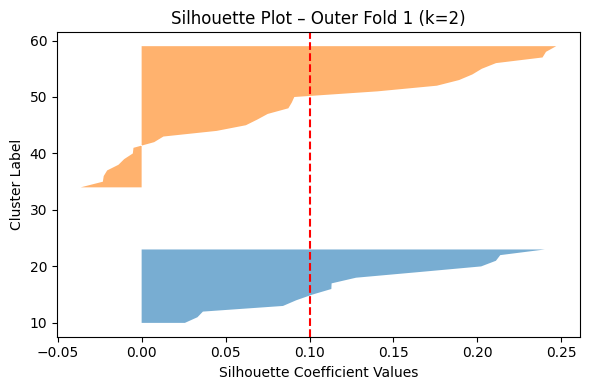


Outer fold: 2
Best k: 2
Mean silhouette score: 0.17
Confustion matrix:
True Label  Cat  Dog
Cluster             
0            11   10
1            10    9


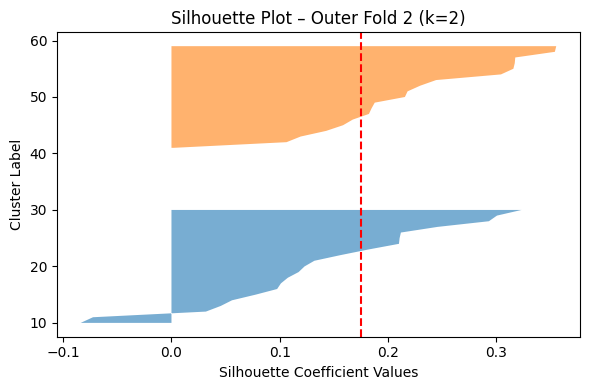


Outer fold: 3
Best k: 2
Mean silhouette score: 0.16
Confustion matrix:
True Label  Cat  Dog
Cluster             
0             9   10
1            12    9


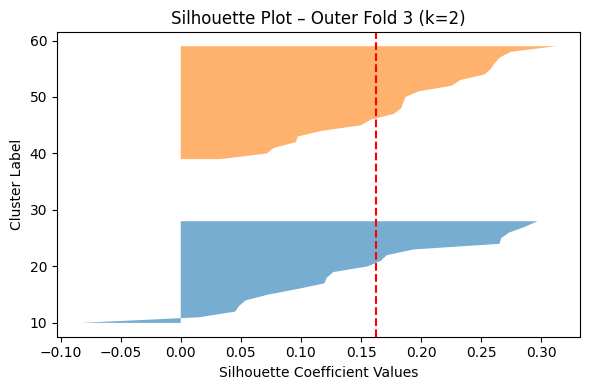


Outer fold: 4
Best k: 2
Mean silhouette score: 0.12
Confustion matrix:
True Label  Cat  Dog
Cluster             
0            13    7
1            10    9


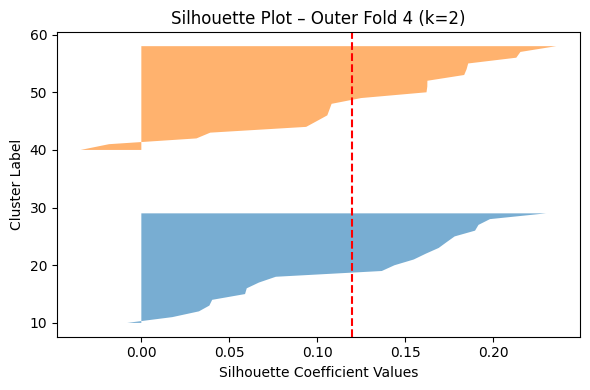


Outer fold: 5
Best k: 2
Mean silhouette score: 0.1
Confustion matrix:
True Label  Cat  Dog
Cluster             
0             8   13
1            10    8


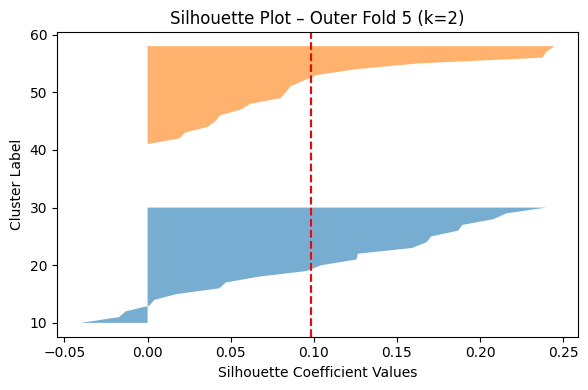


Silhouette Score mean over outer folds: 0.13
Silhouette Score std across outer folds: 0.03
Best k mean over outer folds: 2.0
Best k std over outer folds: 0.0


In [34]:
# Number of clusters in K-Means
k_list = range(2, 10)

# Cross-validation parameters (double cross validation)
number_of_inner_k_folds = 5
number_of_outer_k_folds = 5

# Outer fold - Determines stability
outer_k_fold = KFold(
    n_splits=number_of_outer_k_folds, shuffle=True, random_state=123
)

# Store silhouette scores and best k:s
outer_silhouette_scores = []
best_k_list = []

for i, (outer_train_index, outer_test_index) in enumerate(
        outer_k_fold.split(CATSDOGS_pixels_PCA)):
    
    print("\nOuter fold: " + str(i + 1))

    # Divide into test and train data
    CATSDOGS_pixels_train = CATSDOGS_pixels_PCA[outer_train_index]
    CATSDOGS_pixels_test = CATSDOGS_pixels_PCA[outer_test_index]

    # Inner fold - For tuning (number of clusters)
    inner_k_fold = KFold(
        n_splits=number_of_inner_k_folds, shuffle=True, random_state=i
    )

    # Dictionary for storing scores scores for each k
    k_metrics = {k: [] for k in k_list}

    for inner_train_index, inner_val_index in \
        inner_k_fold.split(CATSDOGS_pixels_train):

        # Divide into test and train data
        inner_train = MNIST_pixels_train[inner_train_index]
        inner_val = MNIST_pixels_train[inner_val_index]

        # Perform K-Means clustering for each k
        for k in k_list:

            # K-Means 
            kmeans = KMeans(
                n_clusters=k, init='k-means++', random_state=0, n_init='auto'
            )
            kmeans.fit(inner_train)

            cluster_labels = kmeans.predict(inner_val)
            sil_score = silhouette_score(inner_val, cluster_labels)
            k_metrics[k].append(sil_score)

    # Calculate average silhouette scores for each k
    avg_scores = {k: np.mean(scores) for k, scores in k_metrics.items()}

    # Calculate best k
    best_k = max(avg_scores, key=avg_scores.get)
    best_k_list.append(best_k)
    print("Best k: " + str(best_k))

    # Calculate silluates on test data
    final_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
    final_kmeans.fit(CATSDOGS_pixels_train)
    final_labels = final_kmeans.predict(CATSDOGS_pixels_test)
    outer_sil = silhouette_score(CATSDOGS_pixels_test, final_labels)
    outer_silhouette_scores.append(outer_sil)
    print("Mean silhouette score: " + str(round(outer_sil, 2)))

    # GENERATED WITH CHATGPT
    # Get true labels for the outer test set
    true_labels =  np.array(CATSDOGS_labels)[outer_test_index]

    # Create a cross-tabulation (cluster vs true label)
    cluster_label_matrix = pd.crosstab(
        final_labels,  # predicted clusters
        true_labels,   # true MNIST labels
        rownames=['Cluster'], colnames=['True Label']
    )

    print("Confustion matrix:")
    print(cluster_label_matrix)

    # GENERATED WITH CHATGPT
    # Compute silhouette values
    sample_silhouette_values = silhouette_samples(CATSDOGS_pixels_test, final_labels)

    # Create silhouette plot
    plt.figure(figsize=(6, 4))
    y_lower = 10
    for cluster in range(best_k):
        ith_cluster_silhouette_values = sample_silhouette_values[final_labels == cluster]
        ith_cluster_silhouette_values.sort()

        size_cluster = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster

        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            alpha=0.6
        )
        y_lower = y_upper + 10  # Space between clusters

    plt.title(f'Silhouette Plot – Outer Fold {i + 1} (k={best_k})')
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.axvline(x=outer_sil, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()


# Calculate final results and print
mean_outer_silhouette = np.mean(outer_silhouette_scores)
std_outer_silhouette = np.std(outer_silhouette_scores)
mean_outer_k = np.mean(best_k_list)
std_outer_k = np.std(best_k_list)

print("\nSilhouette Score mean over outer folds: " 
      + str(round(mean_outer_silhouette, 2)))
print("Silhouette Score std across outer folds: " 
      + str(round(std_outer_silhouette, 2)))
print("Best k mean over outer folds: " 
      + str(round(mean_outer_k, 2)))
print("Best k std over outer folds: " 
      + str(round(std_outer_k, 2)))

## Same code but without PCA (for comparison)


Outer fold: 1
Best k: 2
Mean silhouette score: 0.1


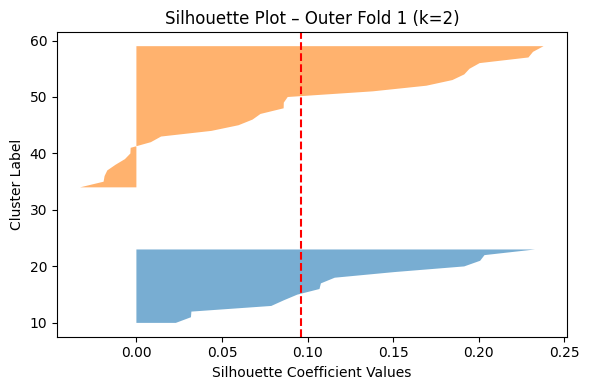


Outer fold: 2
Best k: 2
Mean silhouette score: 0.17


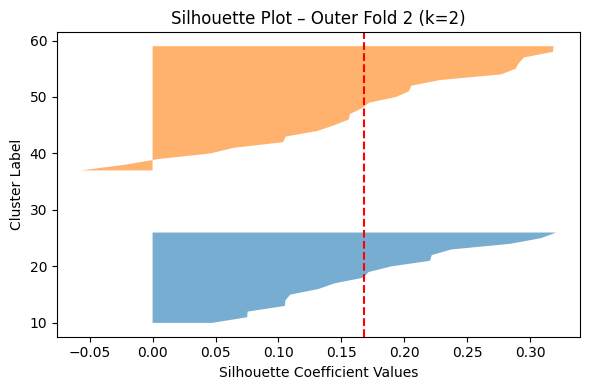


Outer fold: 3
Best k: 2
Mean silhouette score: 0.15


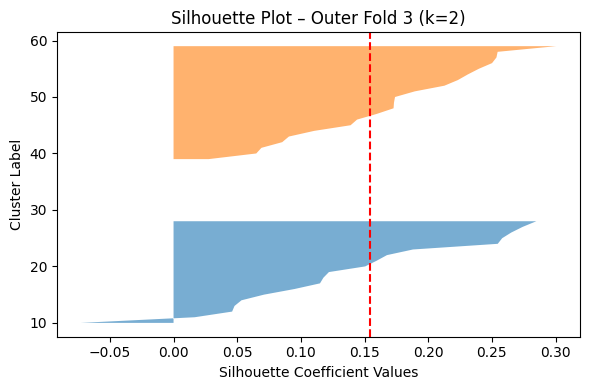


Outer fold: 4
Best k: 2
Mean silhouette score: 0.11


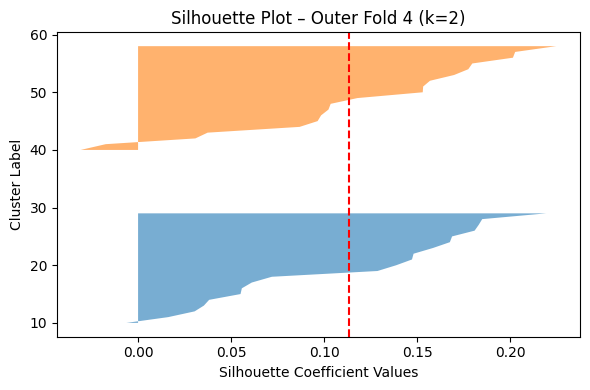


Outer fold: 5
Best k: 2
Mean silhouette score: 0.09


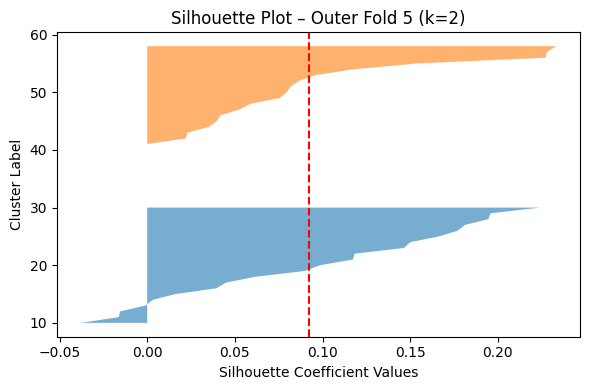


Silhouette Score mean over outer folds: 0.12
Silhouette Score std across outer folds: 0.03
Best k mean over outer folds: 2.0
Best k std over outer folds: 0.0


In [ ]:
# Number of clusters in K-Means
k_list = range(2, 10)

# Cross-validation parameters (double cross validation)
number_of_inner_k_folds = 5
number_of_outer_k_folds = 5

# Outer fold - Determines stability
outer_k_fold = KFold(
    n_splits=number_of_outer_k_folds, shuffle=True, random_state=123
)

# Store silhouette scores and best k:s
outer_silhouette_scores = []
best_k_list = []

for i, (outer_train_index, outer_test_index) in enumerate(
        outer_k_fold.split(CATSDOGS_pixels)):
    
    print("\nOuter fold: " + str(i + 1))

    # Divide into test and train data
    CATSDOGS_pixels_train = CATSDOGS_pixels[outer_train_index]
    CATSDOGS_pixels_test = CATSDOGS_pixels[outer_test_index]

    # Inner fold - For tuning (number of clusters)
    inner_k_fold = KFold(
        n_splits=number_of_inner_k_folds, shuffle=True, random_state=i
    )

    # Dictionary for storing scores scores for each k
    k_metrics = {k: [] for k in k_list}

    for inner_train_index, inner_val_index in \
        inner_k_fold.split(CATSDOGS_pixels_train):

        # Divide into test and train data
        inner_train = MNIST_pixels_train[inner_train_index]
        inner_val = MNIST_pixels_train[inner_val_index]

        # Perform K-Means clustering for each k
        for k in k_list:

            # K-Means 
            kmeans = KMeans(
                n_clusters=k, init='k-means++', random_state=0, n_init='auto'
            )
            kmeans.fit(inner_train)

            cluster_labels = kmeans.predict(inner_val)
            sil_score = silhouette_score(inner_val, cluster_labels)
            k_metrics[k].append(sil_score)

    # Calculate average silhouette scores for each k
    avg_scores = {k: np.mean(scores) for k, scores in k_metrics.items()}

    # Calculate best k
    best_k = max(avg_scores, key=avg_scores.get)
    best_k_list.append(best_k)
    print("Best k: " + str(best_k))

    # Calculate silluates on test data
    final_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
    final_kmeans.fit(CATSDOGS_pixels_train)
    final_labels = final_kmeans.predict(CATSDOGS_pixels_test)
    outer_sil = silhouette_score(CATSDOGS_pixels_test, final_labels)
    outer_silhouette_scores.append(outer_sil)
    print("Mean silhouette score: " + str(round(outer_sil, 2)))

    # GENERATED WITH CHATGPT
    # Get true labels for the outer test set
    true_labels =  np.array(CATSDOGS_labels)[outer_test_index]

    # Create a cross-tabulation (cluster vs true label)
    cluster_label_matrix = pd.crosstab(
        final_labels,  # predicted clusters
        true_labels,   # true MNIST labels
        rownames=['Cluster'], colnames=['True Label']
    )

    print("Confustion matrix:")
    print(cluster_label_matrix)

    # GENERATED WITH CHATGPT
    # Compute silhouette values
    sample_silhouette_values = silhouette_samples(CATSDOGS_pixels_test, final_labels)

    # Create silhouette plot
    plt.figure(figsize=(6, 4))
    y_lower = 10
    for cluster in range(best_k):
        ith_cluster_silhouette_values = sample_silhouette_values[final_labels == cluster]
        ith_cluster_silhouette_values.sort()

        size_cluster = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster

        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            alpha=0.6
        )
        y_lower = y_upper + 10  # Space between clusters

    plt.title(f'Silhouette Plot – Outer Fold {i + 1} (k={best_k})')
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.axvline(x=outer_sil, color="red", linestyle="--")
    plt.tight_layout()
    plt.show()


# Calculate final results and print
mean_outer_silhouette = np.mean(outer_silhouette_scores)
std_outer_silhouette = np.std(outer_silhouette_scores)
mean_outer_k = np.mean(best_k_list)
std_outer_k = np.std(best_k_list)

print("\nSilhouette Score mean over outer folds: " 
      + str(round(mean_outer_silhouette, 2)))
print("Silhouette Score std across outer folds: " 
      + str(round(std_outer_silhouette, 2)))
print("Best k mean over outer folds: " 
      + str(round(mean_outer_k, 2)))
print("Best k std over outer folds: " 
      + str(round(std_outer_k, 2)))